# SFC-PHY Mapping Explained | Test cases generator

Used for test cases generation.

Variables explained:
- `output` path to output folder;
- `PHY_node_count` number of physical nodes;
- `PHY_node_maxCap` maximum capacity of physical nodes;
- `PHY_edge_count` number of physical link (must be greater than `PHY_node_count`);
- `PHY_edge_maxCap` maximum capacity of physical links;
- `SFC_count` number of SFCs;
- `SFC_node_maxCount` maximum number of nodes in a single SFC (must be smaller than `PHY_node_count`);
- `SFC_node_maxReq` maximum requirement of a VNF;
- `SFC_edge_maxReq` maximum requirement of a virtual link.

In [44]:
# Variables
output = "./"

PHY_node_count = 7
PHY_node_maxCap = 77
PHY_edge_count = 13
PHY_edge_maxCap = 53

SFC_count = 4
SFC_node_maxCount = 5
SFC_node_maxReq = 49
SFC_edge_maxReq = 44

In [45]:
# Preparation

# Install Required libraries
# %pip install networkx
# %pip install pulp

# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
import pulp as pulp
import os
import random

output = os.path.join(output, "test-cases")

try:
    if os.path.exists(output):
        for f in os.listdir(output):
            os.remove(f"{output}/{f}")
    else:
        os.mkdir(output)
except OSError as error:
    print(error)

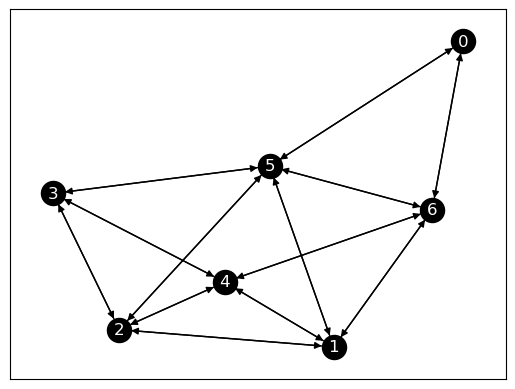

In [46]:
# PHY graph generator
random.seed()
G = nx.DiGraph()

for i in range(PHY_node_count):
    G.add_node(i, Cap=random.randint((int)(PHY_node_maxCap/2),PHY_node_maxCap))

for i in range(PHY_edge_count):
    u = -1
    v = -1
    cap = random.randint((int)(PHY_edge_maxCap/2), PHY_edge_maxCap)
    while (G.edges.get((u, v), "#NOTFOUND") != "#NOTFOUND" or u==v):
        u = random.choice(list(G.nodes))
        v = random.choice(list(G.nodes))
    G.add_edge(u, v, Cap=cap)
    G.add_edge(v, u, Cap=cap)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, node_color='k', edge_color='k', font_color='w', with_labels=True)
plt.show()

nx.write_gml(G, path=f"{output}/phy.gml")

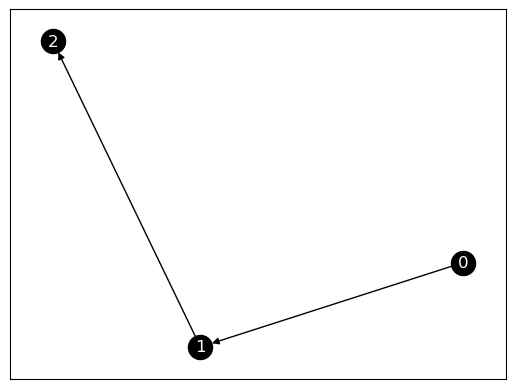

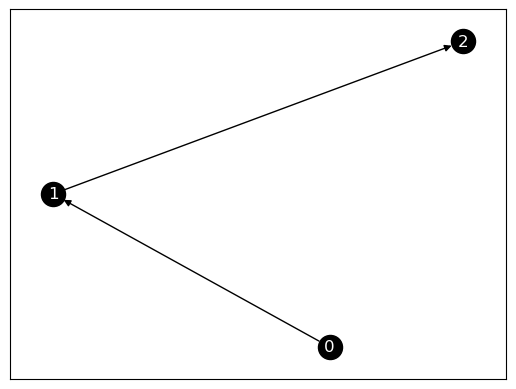

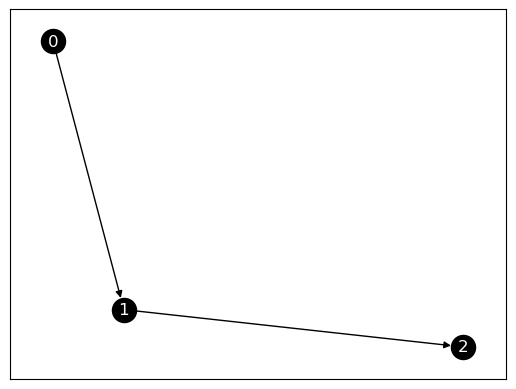

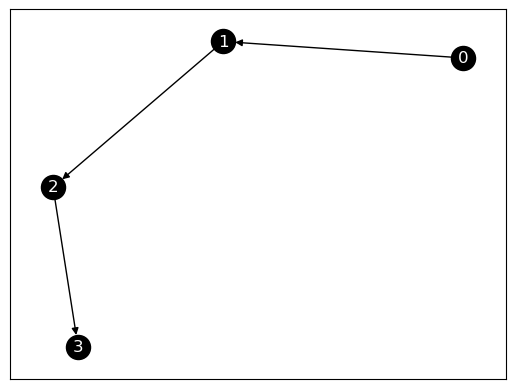

In [47]:
# SFC generator
random.seed()
def SFC_gen():
    Gs = nx.DiGraph()
    for i in range(random.randrange(2, SFC_node_maxCount)):
        Gs.add_node(i, Req=random.randrange((int)(SFC_node_maxReq/2),SFC_node_maxReq))
    for i in list(Gs.nodes)[:-1]:
        Gs.add_edge(i, i+1, Req=random.randint((int)(SFC_edge_maxReq/2), SFC_edge_maxReq))

    return Gs

S = list()
for i in range(SFC_count):
    S.append(SFC_gen())

for Gs in S:
    pos = nx.spring_layout(Gs)
    nx.draw_networkx(Gs, pos=pos, node_color='k', edge_color='k', font_color='w', with_labels=True)
    plt.show()
    nx.write_gml(Gs, path=f"{output}/sfc_{S.index(Gs)}.gml")
